Učitavanje dataseta uspješno završeno
Broj primjera za učenje: 60000
Dimenzije ulaznih podataka: 784
Broj izlaznih klasa: 10


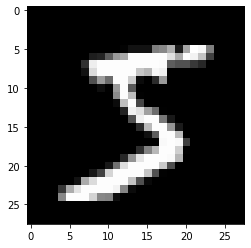

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
from pt_deep import *
from data import *



dataset_root = './tmp/mnist'  # change this to your preference
mnist_train = torchvision.datasets.MNIST(dataset_root, train=True, download=True)
mnist_test = torchvision.datasets.MNIST(dataset_root, train=False, download=True)

x_train, y_train = mnist_train.data, mnist_train.targets
x_test, y_test = mnist_test.data, mnist_test.targets
x_train, x_test = x_train.float().div_(255.0), x_test.float().div_(255.0)

print("Učitavanje dataseta uspješno završeno")

N = x_train.shape[0]
D = x_train.shape[1] * x_train.shape[2]
C = y_train.max().add_(1).item()

print("Broj primjera za učenje:", N)
print("Dimenzije ulaznih podataka:", D)
print("Broj izlaznih klasa:",C)

cmap = plt.get_cmap('gray')
plt.imshow(x_train[0], cmap = cmap)

# 7.1 Treniranje modela na arhitekturi [784,10]

In [ ]:
no_epochs = 3000
lr = 0.1
cuda = True

Yoh_np = class_to_onehot(y_train)

X = torch.tensor(x_train, dtype=torch.float, device="cuda").view(-1,784) # tenzor je u obliku [60000, 28, 28], moramo ga pretvoriti u [60000, 784] da bi mogao ući u našu mrežu
Yoh_ = torch.tensor(Yoh_np, dtype=torch.int32, device="cuda")

print(X.shape)

nnModel = PTDeep([784, 10], activation=torch.relu, cuda =True)
train(nnModel, X, Yoh_, no_epochs, lr, param_lambda = 0, debug  = False)






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


torch.Size([60000, 784])
Final loss:  0.26023412


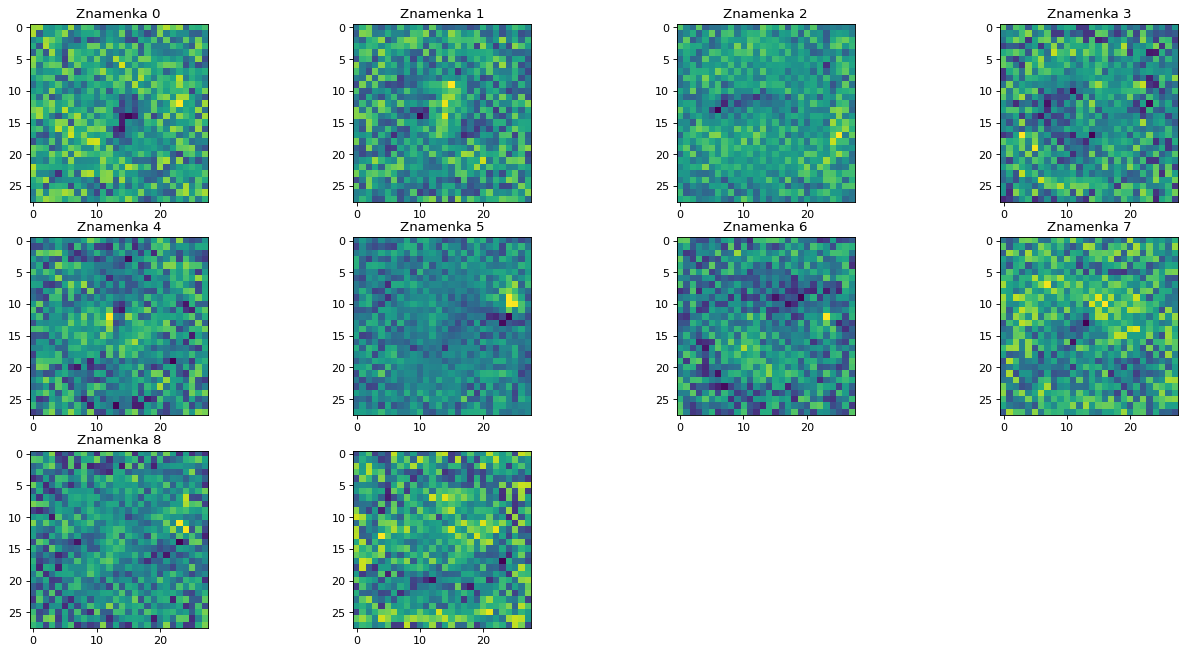

In [ ]:
from matplotlib.pyplot import figure

weights = nnModel.weights[0].detach().cpu().numpy().T.reshape((-1, 28, 28))

figure(figsize=(20, 10), dpi=80)


for i in range(len(weights)):
  plt.title("Znamenka " + str(i-1))
  plt.subplot(3,4,i+1)
  plt.imshow(weights[i])

# 7.2 Proučavanje utjecaja faktora regularizacije na performanse modela

-------------------------------------------------------
lambda = 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


torch.Size([60000, 784])
Final loss:  0.26037163
NN Accuracy: 0.9217
NN Average precision (macro): 0.9205953728118873
NN Average recall (macro): 0.9207069264367853
-------------------------------------------------------
lambda = 0.001


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/content/pt_deep.py:113: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float)


torch.Size([60000, 784])
Final loss:  0.28487095
NN Accuracy: 0.9226
NN Average precision (macro): 0.9215708005107356
NN Average recall (macro): 0.9217956900732187
-------------------------------------------------------
lambda = 0.01
torch.Size([60000, 784])
Final loss:  0.405495
NN Accuracy: 0.9082
NN Average precision (macro): 0.9069232375935037
NN Average recall (macro): 0.9073804719546178
-------------------------------------------------------
lambda = 0.1
torch.Size([60000, 784])
Final loss:  0.76968867
NN Accuracy: 0.8698
NN Average precision (macro): 0.8671419226591072
NN Average recall (macro): 0.870570847698124
-------------------------------------------------------
lambda = 1
torch.Size([60000, 784])
Final loss:  1.6298516
NN Accuracy: 0.8004
NN Average precision (macro): 0.7932212132599931
NN Average recall (macro): 0.8193084441378236


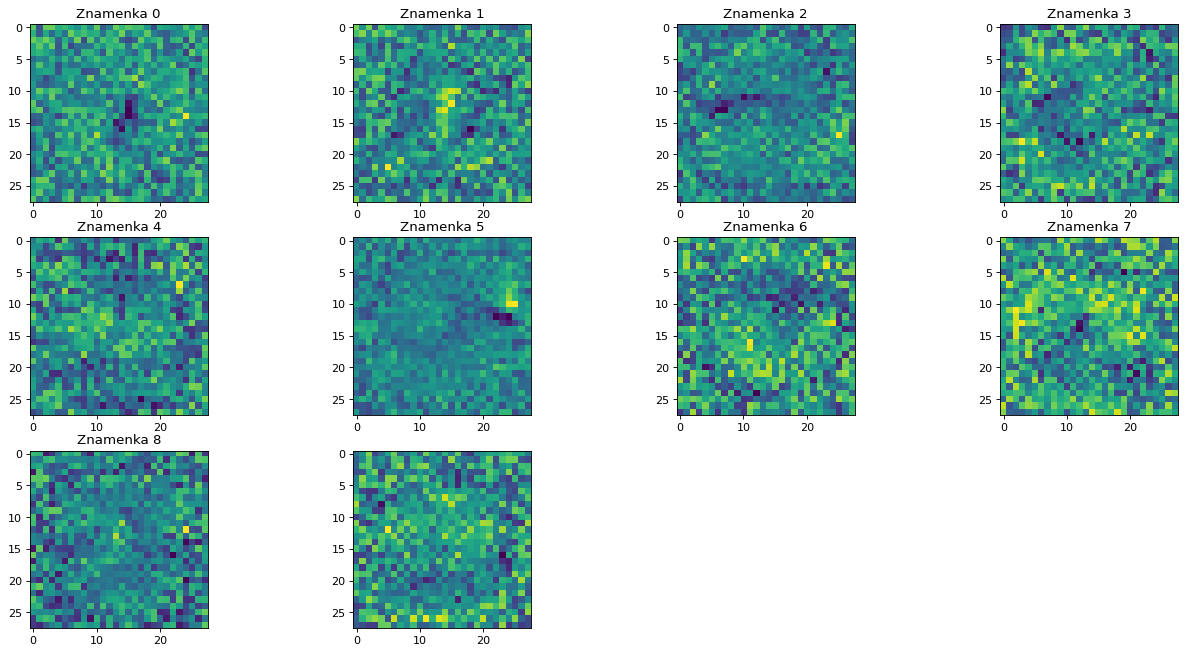

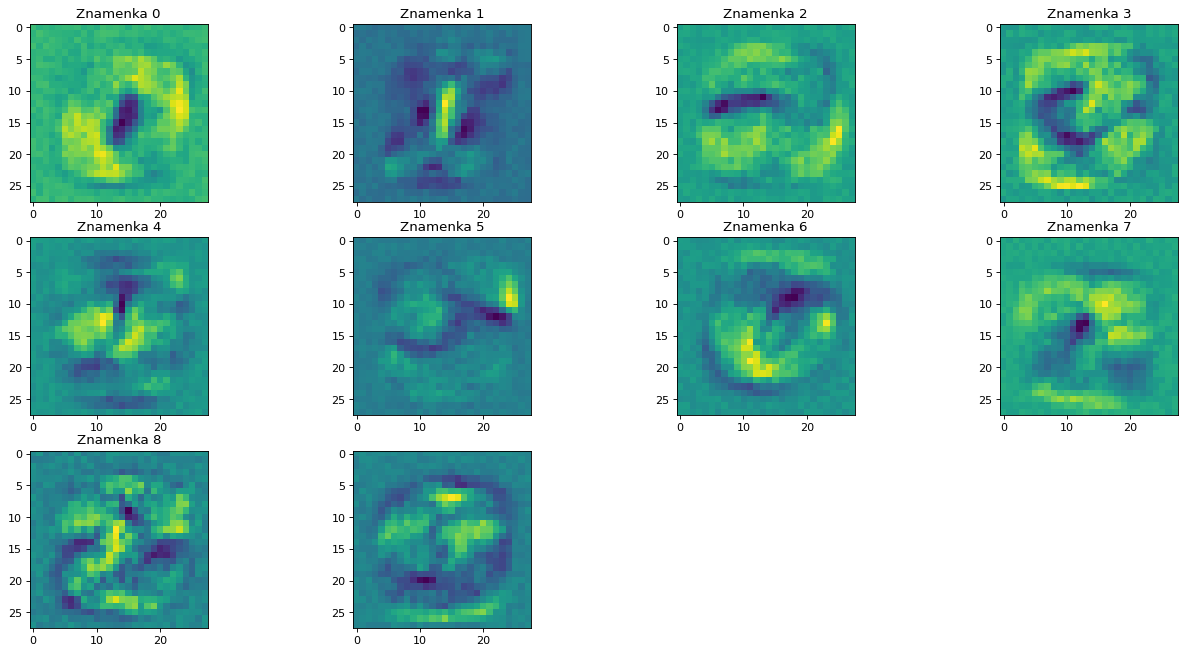

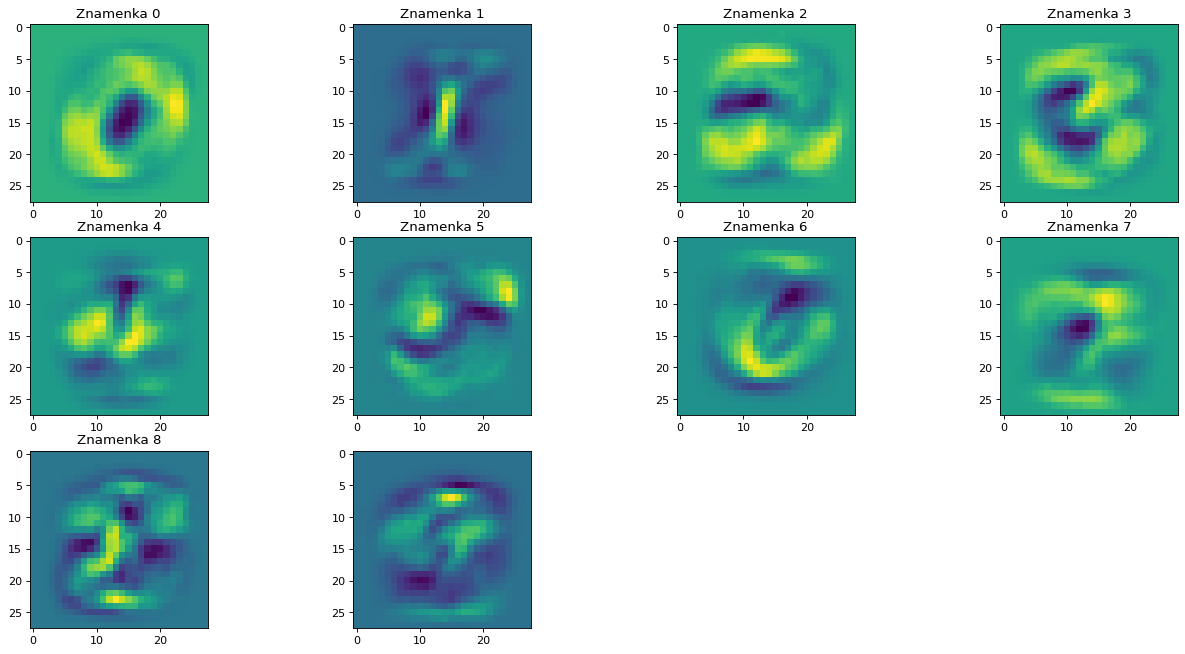

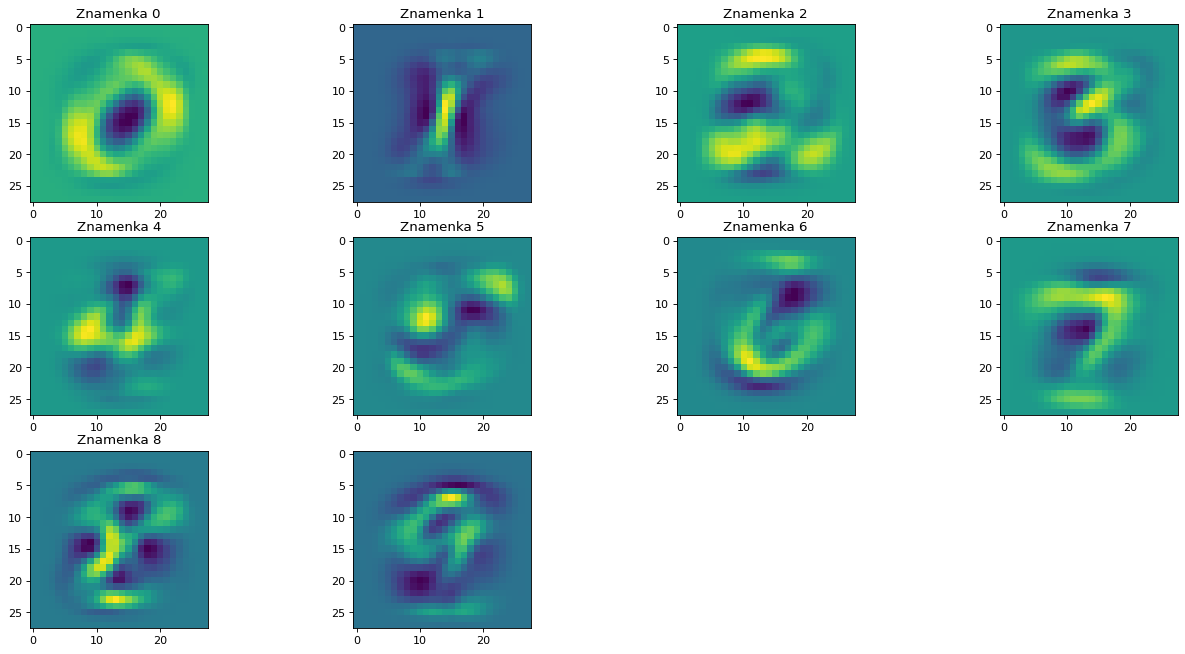

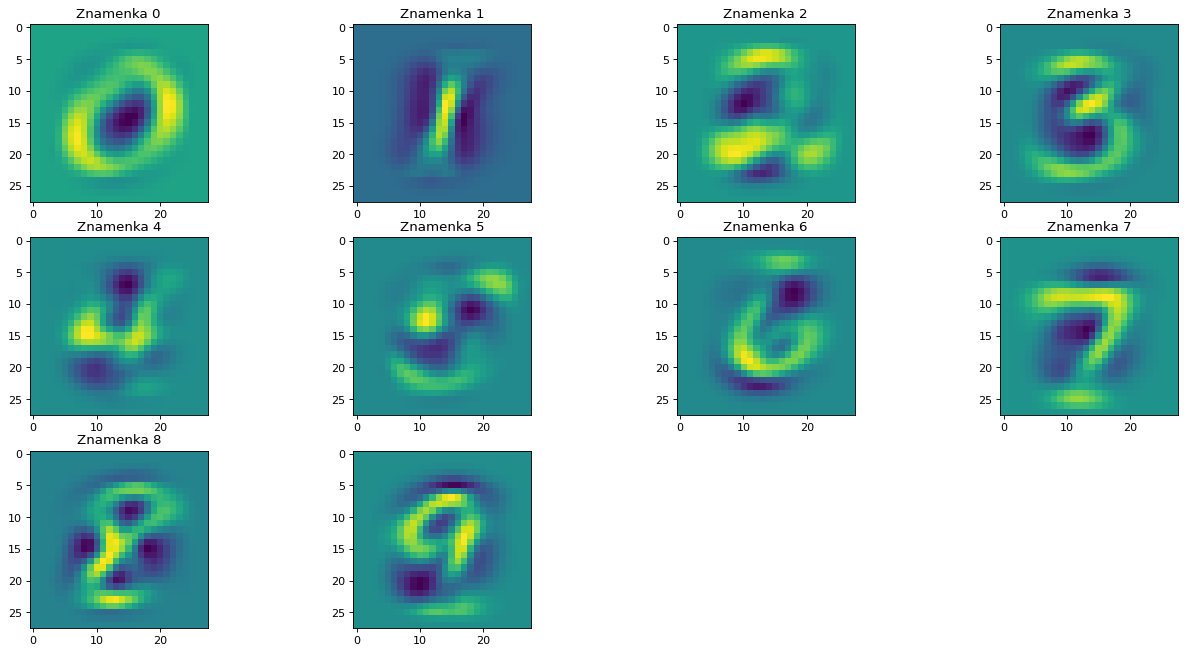

In [ ]:
no_epochs = 3000
lr = 0.1
cuda = True

lambdas = [0,0.001, 0.01, 0.1, 1]

for l in lambdas:
  print("-------------------------------------------------------")
  print("lambda = " + str(l))
  Yoh_np = class_to_onehot(y_train)

  X = torch.tensor(x_train, dtype=torch.float, device="cuda").view(-1,784) # tenzor je u obliku [60000, 28, 28], moramo ga pretvoriti u [60000, 784] da bi mogao ući u našu mrežu
  Yoh_ = torch.tensor(Yoh_np, dtype=torch.int32, device="cuda")

  nnModel = PTDeep([784, 10], activation=torch.relu, cuda =True)
  train(nnModel, X, Yoh_, no_epochs, lr, param_lambda = l, debug  = False)

  y_test.clone().detach().cpu().numpy()
  y_pred = eval(nnModel, X = torch.tensor(x_test, dtype=torch.float, device="cuda").view(-1,784))


  accuracy, pr, avg_precision, avg_recall = eval_perf_multi(y_test.clone().detach().cpu().numpy(), y_pred)
  print("NN Accuracy:", accuracy)
  print("NN Average precision (macro):", avg_precision)
  print("NN Average recall (macro):", avg_recall)

  weights = nnModel.weights[0].detach().cpu().numpy().T.reshape((-1, 28, 28))

  figure(figsize=(20, 10), dpi=80)

  for i in range(len(weights)):
    plt.title("Znamenka " + str(i-1) + ", lambda = " + str(l))
    plt.subplot(3,4,i+1)
    plt.imshow(weights[i])


Dobiveni rezultati su me iskreno jako začudili. Kao što vidimo, modeli sa lambdama 0 i 0.001 postižu najbolje rezultate na skupu za ispitivanje, a njihove matrice težina izgledaju "najružnije", odnosno izgledaju kao čisti šum.

# 7.3 Usporedba MNIST-a na različitim arhitekturama

--------------------------------
Arhitektura [784, 10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  from ipykernel import kernelapp as app


Final loss:  0.26037133
NN Accuracy: 0.9214
NN Average precision (macro): 0.9203004882646996
NN Average recall (macro): 0.9206411195793368
--------------------------------
Arhitektura [784, 100, 10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/content/pt_deep.py:117: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float)


Final loss:  0.075993605
NN Accuracy: 0.9683
NN Average precision (macro): 0.9680201088479174
NN Average recall (macro): 0.9680952483319754


ValueError: ignored

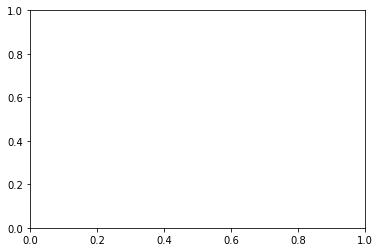

In [ ]:
from matplotlib.pyplot import figure

archs = [[784,10], [784, 100, 10], [784, 100, 100, 10], [784, 100, 100, 100, 10]]

lr = [0.1, 0.01, 0.001, 0.0001]
epochs = [3000, 5000, 10000, 20000]

losses = [[], []]

Yoh_np = class_to_onehot(y_train)

# MAKNI OVO -2, to je samo probno!
for i in range(len(archs) - 2):
    print("--------------------------------")
    print("Arhitektura " + str(archs[i]))

    X = torch.tensor(x_train, dtype=torch.float, device="cuda").view(-1,784) # tenzor je u obliku [60000, 28, 28], moramo ga pretvoriti u [60000, 784] da bi mogao ući u našu mrežu
    Yoh_ = torch.tensor(Yoh_np, dtype=torch.int32, device="cuda")

    nnModel = PTDeep(archs[i], activation=torch.relu, cuda = True)
    losses[i] = train(nnModel, X, Yoh_, epochs[i], lr[i], param_lambda = 0, debug  = False)

    y_test.clone().detach().cpu().numpy()
    y_pred = eval(nnModel, X = torch.tensor(x_test, dtype=torch.float, device="cuda").view(-1,784))


    accuracy, pr, avg_precision, avg_recall = eval_perf_multi(y_test.clone().detach().cpu().numpy(), y_pred)
    print("NN Accuracy:", accuracy)
    print("NN Average precision (macro):", avg_precision)
    print("NN Average recall (macro):", avg_recall)


figure(figsize=(20, 10), dpi=80)
for i in range(len(losses)):
  plt.plot(range(epochs[i]), losses[i])
  
plt.legend(['[784,10]', '[784, 100, 10]'], loc='upper left')
  



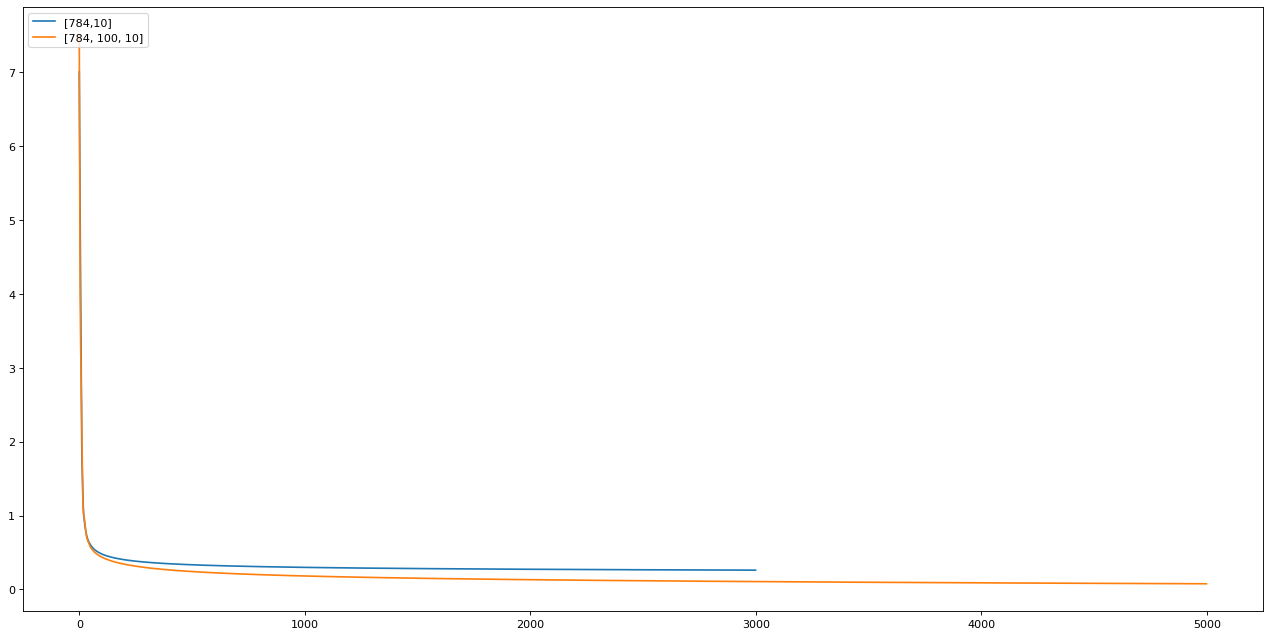

In [ ]:
from matplotlib.pyplot import figure


figure(figsize=(20, 10), dpi=80)
for i in range(len(losses)):
  plt.plot(range(epochs[i]), losses[i])
  
plt.legend(['[784,10]', '[784, 100, 10]'], loc='upper left')


# 7.4 Early stopping

In [3]:
from pt_deep import *

X = torch.tensor(x_train, dtype=torch.float, device="cuda").view(-1,784) # tenzor je u obliku [60000, 28, 28], moramo ga pretvoriti u [60000, 784] da bi mogao ući u našu mrežu

train_count = X.size()[0]*0.8

train_index = torch.randperm(int(X.size()[0]*0.8))

val_index = []

for i in range(X.size()[0]):
  if i not in (train_index):
    val_index.append(i)


X_train = X[train_index]
Y_train = y_train[train_index]
X_val = X[val_index]
Y_val = y_train[val_index]

print("X train size: ", X_train.shape)
print("Y train size: ", Y_train.shape)
print("X val size: ", X_val.shape)
print("Y val size: ", Y_val.shape)

no_epochs = 3000
lr = 0.1
cuda = True

Yoh_ = class_to_onehot(Y_train)

Y_train_oh = torch.tensor(Yoh_, dtype=torch.int32, device="cuda")

nnModel = PTDeep([784, 10], activation=torch.relu, cuda =True)
Y_val_np = Y_val.clone().detach().cpu().numpy()
losses = train_early_stop(nnModel, X_train, Y_train_oh,X_val, Y_val_np, no_epochs, lr, param_lambda = 0, debug  = False)

y_pred = eval(nnModel, X = torch.tensor(x_test, dtype=torch.float, device="cuda").view(-1,784))

accuracy, pr, avg_precision, avg_recall = eval_perf_multi(y_test.clone().detach().cpu().numpy(), y_pred)
print("NN Accuracy:", accuracy)
print("NN Average precision (macro):", avg_precision)
print("NN Average recall (macro):", avg_recall)






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


X train size:  torch.Size([48000, 784])
Y train size:  torch.Size([48000])
X val size:  torch.Size([12000, 784])
Y val size:  torch.Size([12000])


/content/pt_deep.py:166: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float)


Early stop at epoch 2958
Final loss:  0.2584078
NN Accuracy: 0.9212
NN Average precision (macro): 0.9200742581502169
NN Average recall (macro): 0.920096540650458


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


# 7.5 Procjena baseline modela

In [9]:
# dakle, procjenjujemo model sa slučajno inicijaliziranim težinama koji ne treniramo


Yoh_np = class_to_onehot(y_train)

X = torch.tensor(x_train, dtype=torch.float, device="cuda").view(-1,784) # tenzor je u obliku [60000, 28, 28], moramo ga pretvoriti u [60000, 784] da bi mogao ući u našu mrežu
Yoh_ = torch.tensor(Yoh_np, dtype=torch.int32, device="cuda")

nnModel = PTDeep([784, 10], activation=torch.relu, cuda = True)
loss = nnModel.get_loss(X, Yoh_)
y_pred = eval(nnModel, X = torch.tensor(x_test, dtype=torch.float, device="cuda").view(-1,784))

print("Loss", loss.clone().detach().cpu().numpy())
accuracy, pr, avg_precision, avg_recall = eval_perf_multi(y_test.clone().detach().cpu().numpy(), y_pred)
print("NN Accuracy:", accuracy)
print("NN Average precision (macro):", avg_precision)
print("NN Average recall (macro):", avg_recall)



Loss 6.64928
NN Accuracy: 0.0654
NN Average precision (macro): 0.0647360061091106
NN Average recall (macro): 0.09247223819800095


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()
/content/pt_deep.py:166: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  losses = []


Očekivano, dobili smo vrlo visok loss i vrlo nisku preciznost, točnost i odziv. Loss koji smo dobili ustvari odgovara lossu na samom početku treniranja modela.



# 7.6 ADAM optimizer - fiksni korak učenja

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


Final loss:  0.5629347
NN Accuracy: 0.8314
NN Average precision (macro): 0.8294850440603942
NN Average recall (macro): 0.829734963234246


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
/content/pt_deep.py:203: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float)


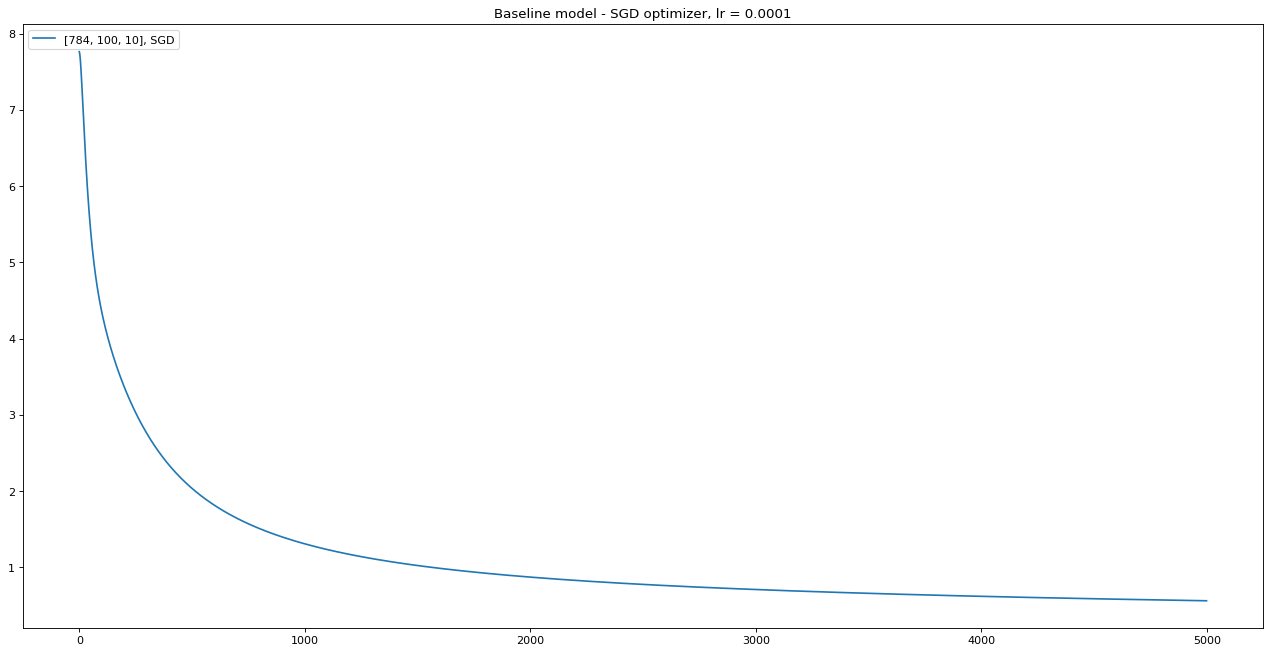

In [8]:
from matplotlib.pyplot import figure

Yoh_np = class_to_onehot(y_train)

no_epochs = 5000

X = torch.tensor(x_train, dtype=torch.float, device="cuda").view(-1,784) # tenzor je u obliku [60000, 28, 28], moramo ga pretvoriti u [60000, 784] da bi mogao ući u našu mrežu
Yoh_ = torch.tensor(Yoh_np, dtype=torch.int32, device="cuda")

nnModel = PTDeep([784, 100, 10], activation=torch.relu, cuda = True)
losses = train(nnModel, X, Yoh_, no_epochs, 0.0001, param_lambda = 0, debug  = False)
y_pred = eval(nnModel, X = torch.tensor(x_test, dtype=torch.float, device="cuda").view(-1,784))

accuracy, pr, avg_precision, avg_recall = eval_perf_multi(y_test.clone().detach().cpu().numpy(), y_pred)
print("NN Accuracy:", accuracy)
print("NN Average precision (macro):", avg_precision)
print("NN Average recall (macro):", avg_recall)

figure(figsize=(20, 10), dpi=80)

plt.plot(range(no_epochs), losses)
plt.title("Baseline model - SGD optimizer, lr = 0.0001")
  
plt.legend(['[784, 100, 10], SGD'], loc='upper left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


Final loss:  0.05073117
NN Accuracy: 0.9667
NN Average precision (macro): 0.9663556862712224
NN Average recall (macro): 0.9664368853572171


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()
/content/pt_deep.py:203: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float)


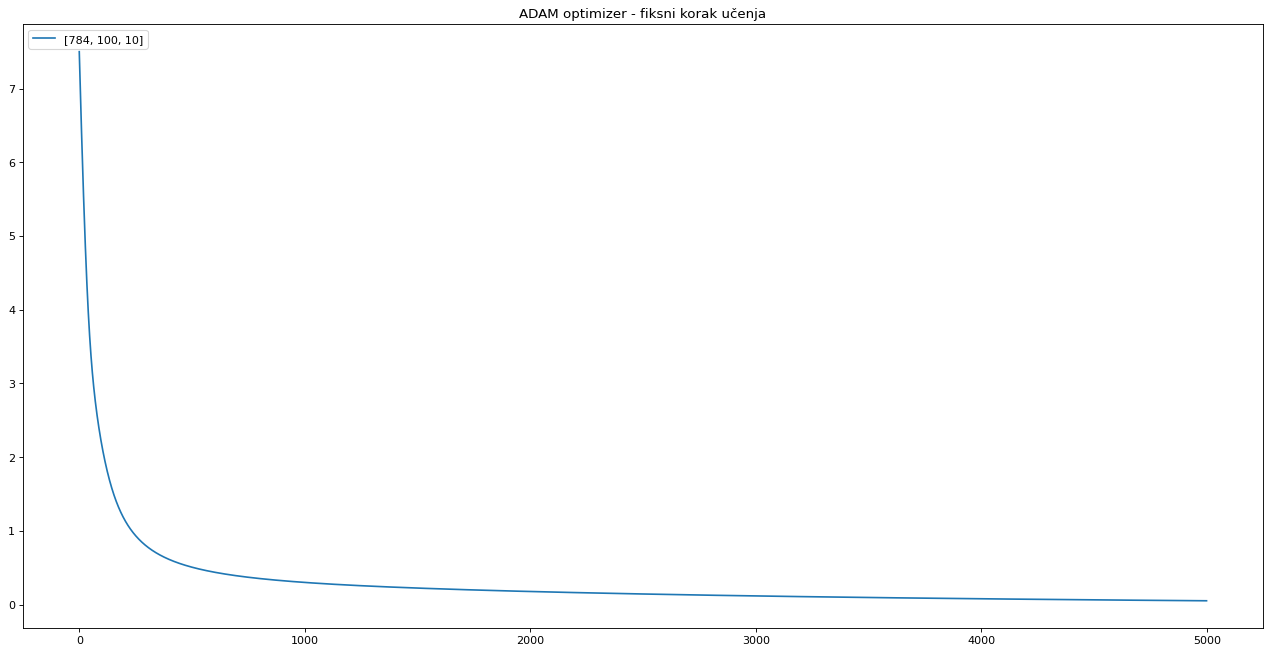

In [7]:
Yoh_np = class_to_onehot(y_train)
from matplotlib.pyplot import figure

no_epochs = 5000

X = torch.tensor(x_train, dtype=torch.float, device="cuda").view(-1,784) # tenzor je u obliku [60000, 28, 28], moramo ga pretvoriti u [60000, 784] da bi mogao ući u našu mrežu
Yoh_ = torch.tensor(Yoh_np, dtype=torch.int32, device="cuda")

nnModel = PTDeep([784, 100, 10], activation=torch.relu, cuda = True)
losses = train_adam(nnModel, X, Yoh_, no_epochs, 0.0001, param_lambda = 0, debug  = False)
y_pred = eval(nnModel, X = torch.tensor(x_test, dtype=torch.float, device="cuda").view(-1,784))

accuracy, pr, avg_precision, avg_recall = eval_perf_multi(y_test.clone().detach().cpu().numpy(), y_pred)
print("NN Accuracy:", accuracy)
print("NN Average precision (macro):", avg_precision)
print("NN Average recall (macro):", avg_recall)

figure(figsize=(20, 10), dpi=80)

plt.plot(range(no_epochs), losses)
plt.title("ADAM optimizer - fiksni korak učenja")
  
plt.legend(['[784, 100, 10]'], loc='upper left')

Vidimo da model s ADAM optimizatorom postiže bolje rezultate nego model iste arhitekture sa optimizatorom SGD (razlika u lossu cca. 0.05, iako, zanimljivo, nema značajne razlike u točnosti na skupu za ispitivanje). Također, uspoređujući grafove za SGD optimizer i ADAM, vidimo da loss kod ADAMa na početku ima dosta strmiji pad nego SGD, što sugerira da se na početku "jače" približava minimumu.

# 7.7 ADAM optimizer - varijabilni korak učenja

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


Final loss:  0.06872286
NN Accuracy: 0.9635
NN Average precision (macro): 0.9631613970748696
NN Average recall (macro): 0.9631693532251099


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
/content/pt_deep.py:203: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float)


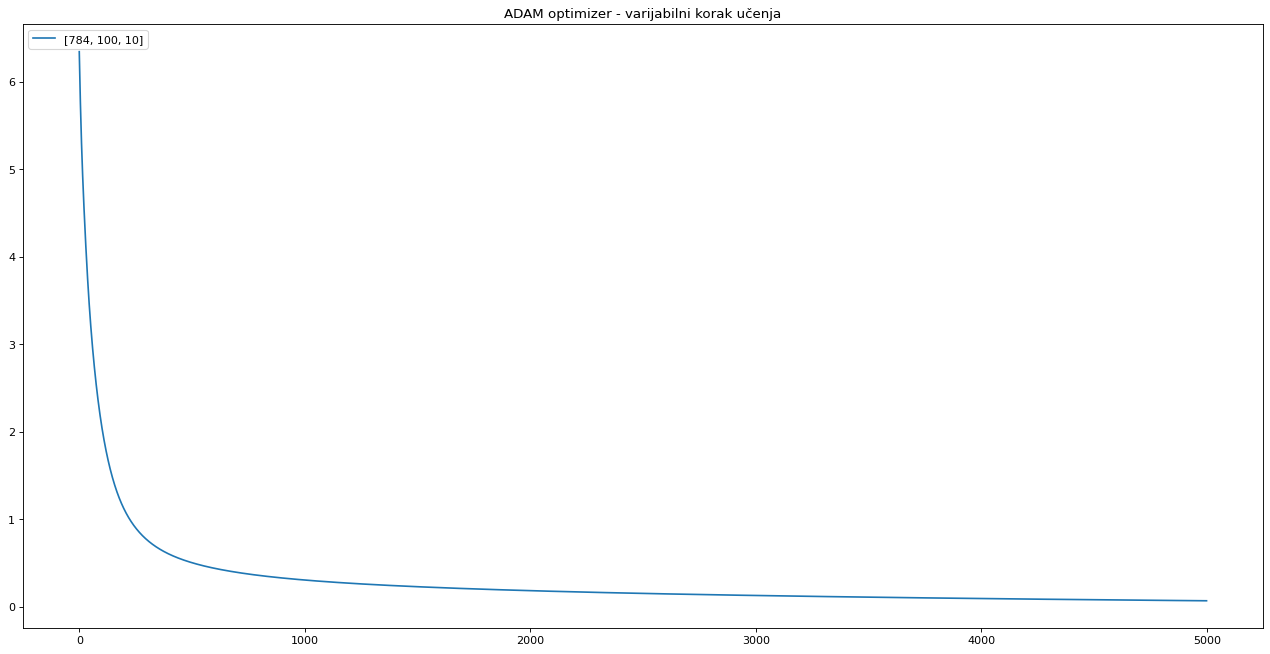

In [9]:
Yoh_np = class_to_onehot(y_train)
from matplotlib.pyplot import figure


no_epochs = 5000

X = torch.tensor(x_train, dtype=torch.float, device="cuda").view(-1,784) # tenzor je u obliku [60000, 28, 28], moramo ga pretvoriti u [60000, 784] da bi mogao ući u našu mrežu
Yoh_ = torch.tensor(Yoh_np, dtype=torch.int32, device="cuda")

nnModel = PTDeep([784, 100, 10], activation=torch.relu, cuda = True)
losses = train_adam(nnModel, X, Yoh_, no_epochs, 0.0001, param_lambda = 0, variable_lr = True, debug  = False)
y_pred = eval(nnModel, X = torch.tensor(x_test, dtype=torch.float, device="cuda").view(-1,784))

accuracy, pr, avg_precision, avg_recall = eval_perf_multi(y_test.clone().detach().cpu().numpy(), y_pred)
print("NN Accuracy:", accuracy)
print("NN Average precision (macro):", avg_precision)
print("NN Average recall (macro):", avg_recall)

figure(figsize=(20, 10), dpi=80)

plt.plot(range(no_epochs), losses)
plt.title("ADAM optimizer - varijabilni korak učenja")
  
plt.legend(['[784, 100, 10]'], loc='upper left')


Kao što vidimo, rezultati su bolji kad ne koristimo LR scheduler, iako to je možda zbog nedovoljne dubine modela, premalog broja epoha i premalog početnog LR. Također, zbog doze nedeterminizma koju unosimo početnom inicijalizacijom težina, performanse modela se donekle razlikuju svaki put kad ih treniramo, pa to također može objasniti razliku između 2 modela.

# 7.8 Performanse SVM modela na MNIST skupu podataka

In [17]:
from ksvm_wrap import *

X = torch.tensor(x_train, dtype=torch.float, device="cuda").view(-1,784) # tenzor je u obliku [60000, 28, 28], moramo ga pretvoriti u [60000, 784] da bi mogao ući u našu mrežu
# linearni SVM
svmModel = KSVMWrap(X.clone().detach().cpu().numpy(), y_train.clone().detach().cpu().numpy())

x_test_svm = torch.tensor(x_test, dtype=torch.float, device="cuda").view(-1,784).clone().detach().cpu().numpy()
y_pred = svmModel.predict(x_test_svm)

accuracy, pr, avg_precision, avg_recall = eval_perf_multi(y_test.clone().detach().cpu().numpy(), y_pred)
print("Accuracy:", accuracy)
print("Average precision (macro):", avg_precision)
print("Average recall (macro):", avg_recall)






Accuracy: 0.9404
Average precision (macro): 0.9394223313176162
Average recall (macro): 0.9399179178125058


In [18]:
from ksvm_wrap import *

X = torch.tensor(x_train, dtype=torch.float, device="cuda").view(-1,784) # tenzor je u obliku [60000, 28, 28], moramo ga pretvoriti u [60000, 784] da bi mogao ući u našu mrežu
# linearni SVM
svmModel = KSVMWrap(X.clone().detach().cpu().numpy(), y_train.clone().detach().cpu().numpy(), kernel="rbf")

x_test_svm = torch.tensor(x_test, dtype=torch.float, device="cuda").view(-1,784).clone().detach().cpu().numpy()
y_pred = svmModel.predict(x_test_svm)

accuracy, pr, avg_precision, avg_recall = eval_perf_multi(y_test.clone().detach().cpu().numpy(), y_pred)
print("Accuracy:", accuracy)
print("Average precision (macro):", avg_precision)
print("Average recall (macro):", avg_recall)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


Accuracy: 0.9446
Average precision (macro): 0.9438578263932589
Average recall (macro): 0.9440782460310014


Vidimo da SVM klasifikator ostvaruje iznimno dobre rezultate na datasetu MNIST, ali ipak malo lošije nego najbolji duboki modeli.

# 7.9 Učenje s minigrupama

------------------------------------
Minibatch size: 60000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Final loss:  0.43331224
NN Accuracy: 0.8731
NN Average precision (macro): 0.8712514793338375
NN Average recall (macro): 0.8712294675606683
------------------------------------
Minibatch size: 30000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/content/pt_deep.py:249: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float)


Final loss:  0.3361555
NN Accuracy: 0.8971
NN Average precision (macro): 0.895540808437173
NN Average recall (macro): 0.8958739731982748
------------------------------------
Minibatch size: 15000
Final loss:  0.25679293
NN Accuracy: 0.9221
NN Average precision (macro): 0.9212565429460244
NN Average recall (macro): 0.9211009086392961
------------------------------------
Minibatch size: 7500
Final loss:  0.19739594
NN Accuracy: 0.9446
NN Average precision (macro): 0.9439598399625844
NN Average recall (macro): 0.9441329609851685


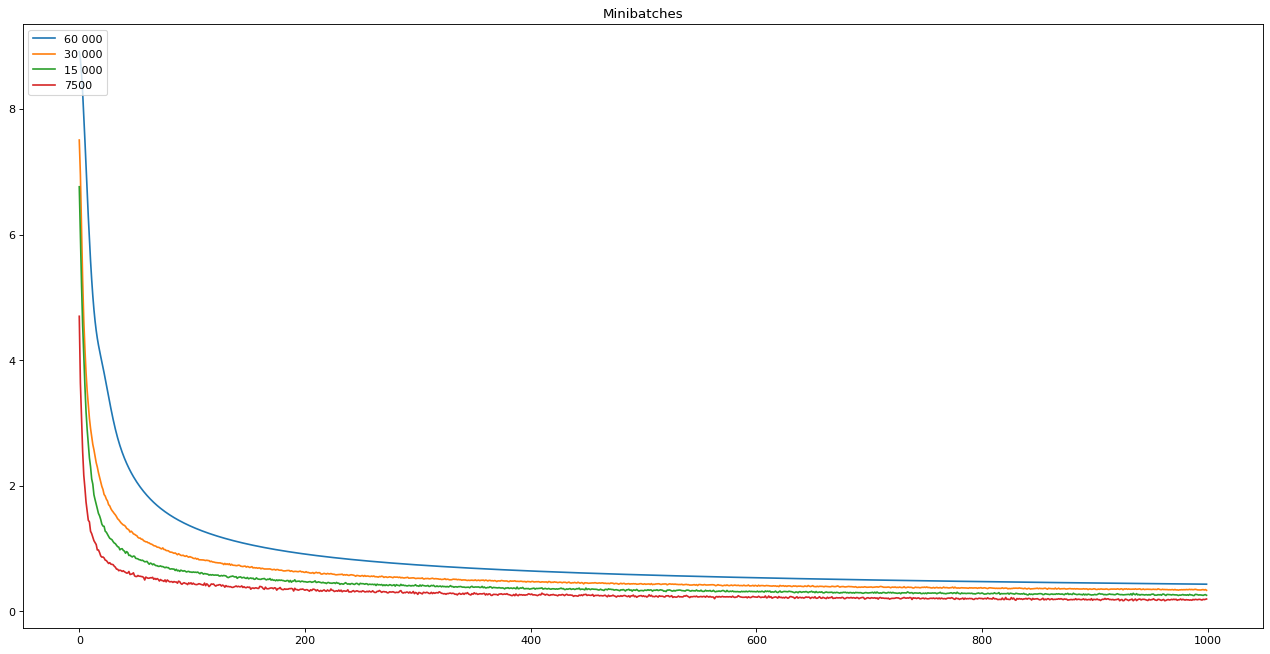

In [12]:
#https://discuss.pytorch.org/t/shuffle-images-ina-tensor-during-training/2157

# ind_shuffled = torch.randperm(len(x_train))

# tensor_1 = X[1, :] # ovo je tako dobro, mozes ovako indeksirati određene dimenzije tenzora
# tensor_2 = X[2, :]
# tensor_r = torch.vstack([tensor_1, tensor_2])
# tensor_r.shape

Yoh_np = class_to_onehot(y_train)
from matplotlib.pyplot import figure

no_epochs = 1000

mb_sizes = [60000, 30000, 15000, 7500]
losses = []

for mb_size in mb_sizes:
  print("------------------------------------")
  print("Minibatch size:", mb_size)

  X = torch.tensor(x_train, dtype=torch.float, device="cuda").view(-1,784) # tenzor je u obliku [60000, 28, 28], moramo ga pretvoriti u [60000, 784] da bi mogao ući u našu mrežu
  Yoh_ = torch.tensor(Yoh_np, dtype=torch.int32, device="cuda")

  nnModel = PTDeep([784, 100, 10], activation=torch.relu, cuda = True)
  loss = train_mb(nnModel, X, Yoh_, no_epochs, 0.001, param_lambda = 0,mb_size = mb_size, debug  = False)
  y_pred = eval(nnModel, X = torch.tensor(x_test, dtype=torch.float, device="cuda").view(-1,784))

  accuracy, pr, avg_precision, avg_recall = eval_perf_multi(y_test.clone().detach().cpu().numpy(), y_pred)
  print("NN Accuracy:", accuracy)
  print("NN Average precision (macro):", avg_precision)
  print("NN Average recall (macro):", avg_recall)
  losses.append(loss)

figure(figsize=(20, 10), dpi=80)

for loss in losses:
  plt.plot(range(no_epochs), loss)

plt.title("Minibatches")
  
plt.legend(['60 000', '30 000', '15 000', '7500'], loc='upper left')


Vidimo da se smanjenem veličine mini grupe postiže bolja konvergencija. No, trade-off je taj da što nam je veličina mini grupe manja, treniranje traje duže. Također, kod krivulja gubitka za minibatch SGD vidimo određene fluktuacije u funkciji gubitka - one nam pomažu izbjeći lokalne optimume i približiti se (boljem/globalnom) minimumu.